# Chat Logs and Summaries

### Question 7:

##### [Link to chat log](https://chatgpt.com/share/670f02e4-35fc-8002-86c3-6a485dd8aace)

##### Chatbot-provided summary: 
"In this session, you provided code that computes a p-value for a two-tailed hypothesis test. You asked for it to be modified to compute the p-value for a one-tailed hypothesis test.

I explained the differences between two-tailed and one-tailed tests, specifically focusing on how to count "extreme" simulated statistics for a one-tailed test. I then provided modified code that computes the p-value for a one-tailed test, where the alternative hypothesis is that the observed statistic is greater than the hypothesized population parameter.

This summary covers the key aspects discussed: converting from a two-tailed to a one-tailed hypothesis test and the corresponding code adjustment."

---
# Question Responses

##### Question 1:
The "key factor that makes the difference between ideas that can, and cannot be examined and tested statistically" is whether the ideas can be quantifiably analyzed and tested using data. The key criteria that defines a good null hypothesis is if it accurately describes the idea that whatever effect is being studied does not exist, and if it can be evaluated quantifiably with statistical analysis. The difference between a null hypothesis and an alternative hypothesis in the context of hypothesis testing is that the alternative hypothesis is typically defined to be true when the null hypothesis isn't, serving as a possible conclusion in the case that the null hypothesis is rejected.


##### Question 2:
The sentence means that when trying to test a hypothesis about a parameter of the population being studied, meaning some property of a population such as the mean, the results of the statistical tests you perform on observed sample data refer to the population parameter rather than a property of the smaller sample. 

##### Question 3:
The p-value is the probability of getting a value equal to or more extreme than the experimentally-obtained statistic from a sampling distribution that assumes the null hypothesis is true, or in other words, when imagining a world where the null hypothesis is true.

##### Question 4:
The smaller the p-value, the less likely it is to obtain a result at least as extreme as the one that was actually observed assuming the null hypothesis is true, meaning the null hypothesis being true is unlikely.

##### Question 5:

In [26]:
import numpy as np
import plotly.express as px
import pandas as pd

n_sim_samples = 10000
sim_sample_means = np.zeros(n_sim_samples)

for i in range(n_sim_samples):
    sim_sample_means[i] = np.random.choice(2, 100).mean()

p = (abs(sim_sample_means - 0.5) >= 0.145).sum()/n_sim_samples

print("p_value:\t\t" + str(p))
print("0.01 >= p >= 0.001:\t" + str(0.01 >= p >= 0.001))

p_value:		0.004
0.01 >= p >= 0.001:	True


$ p = 0.004$, so 
$ 0.01 \ge p > 0.001$, therefore there is strong evidence against the null hypothesis (that humans don't tend to tilt left or right).

##### Question 6:
A p-value cannot technically definitively prove that a null hypothesis is false or true, since the p-value is probabilistically based so it cannot be used as evidence to prove anything with certainty. Therefore in the second pre-lecture video, it is impossible to definitively prove that Fido is innocent or guilty using a p-value. However, if the p-value provides extremely strong evidence against or for the null hypothesis (i.e. is extremely close to 1 or extremely small, such as a millionth), the possibility that the conclusion the p-value suggests is incorrect becomes extremely improbable.


##### Question 7:

In [17]:
# Code from Tutorial 5:
import pandas as pd
import numpy as np

patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

patient_data['HealthScoreChange'] = patient_data.FinalHealthScore-patient_data.InitialHealthScore

np.random.seed(1)  # make simulation reproducible
number_of_simulations = 10000  # experiment with this... what does this do?
n_size = len(patient_data)  # 10
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

# generate "random improvement" proportions assuming H0 (vaccine has no average effect) is true 
# meaning that the "before and after" differences are positive or negative at "random"
for i in range(number_of_simulations):
    
    # why is this equivalent to the suggested idea above?
    random_improvement = np.random.choice([0,1], size=len(patient_data), replace=True)  # <<< `replace=True` ^^^

    # why is .mean() a proportion? 
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()
    # why is this the statistic we're interested in? Hint: next section...
    
population_parameter_value_under_H0 = 0.5

In [13]:
# Code from Chatbot:
# Calculate the p-value for a one-tailed test (observed_statistic > population_parameter_value_under_H0)

observed_statistic = (patient_data.HealthScoreChange > 0).mean()
simulated_statistics = IncreaseProportionSimulations_underH0random

# Count simulated statistics that are greater than or equal to the observed statistic
SimStats_as_or_more_extreme_than_ObsStat = \
    simulated_statistics >= observed_statistic

p_value = SimStats_as_or_more_extreme_than_ObsStat.sum() / number_of_simulations

print("Number of Simulations:", number_of_simulations)
print("Number of simulated statistics (under H0) that are 'as or more extreme' than the observed statistic:", SimStats_as_or_more_extreme_than_ObsStat.sum())
print("p-value:", p_value)

Number of Simulations: 10000
Number of simulated statistics (under H0) that are 'as or more extreme' than the observed statistic: 565
p-value: 0.0565


Because the analysis is now one-sided to the right, the variable `SimStats_as_or_more_extreme_than_ObsStat` now contains only `simulated_statistics` as or more extreme than `observed_statistic` in the rightward direction, or equivalently, only `simulated_statistics` greater than or equal to `observed_statistic`. Because of this, the code no longer needs to compare the distances of `simulated_statistics` and `observed_statistic` from the `population_parameter_value_under_H0`. This is the only (non-cosmetic) change in the code.

The interpretation of the hypothesis test has changed in that the p-value $p=0.0565$ now refers to the proportion of the simulated statistics under the null hypothesis that are greater than or equal to the observed statistic, rather than the proportion that is as or more extreme than the observed statistic. In other words, the p-value now refers to the probability of obtaining a value from tests results greater than or equal to the observed statistic value. This means the p-value is no longer precisely providing evidence against the null hypothesis $H_0 : p = 0.5$ as the corresponding alternative hypothesis is now more accurately $H_A : p > 0.5$ instead of $H_A : p \neq 0.5$ (so the null hypothesis is really $H_0 : p \le 0.5$).

We should expect the p-value to be necessarily smaller in the one-tailed analysis than the two-tailed one assuming the direction picked for the one-tailed testing is the one that the observed value is located in. Since a p-value is the probability of getting a value in the critical area at the tail(s) past some observed statistic, including both tails effectively increases the critical area being accounted for, which increases the probability which increases the p-value. 

However, if the chosen direction of the one-tailed analysis is incorrect (the opposite direction of the observed statistic), this is not the case, since instead of the p-value representing the probability of obtaining a test result in what should be a critical area, the "critical area" will now actually be the majority of the distribution.

##### Question 8:
We want to evaluate if students in STA130 are able to determine in a cup of tea whether the milk or tea was poured first by taste, similarly to the experiment with Fisher and Bristol. To do this, we will evaluate the likelihood that the population mean of the guesses is 0.5, assuming a correct guess has a value of 1 and an incorrect guess a value of 0. This will be done by analyzing the data sample that 49 out of 80 students were able to correctly state which was poured first to compute a p-value and conduct hypothesis testing.

The null hypothesis will be that the chance of a student stating the correct answer is 50%:

$H_0 : p = 0.5$

The corresponding alternative hypothesis will be that the chance of a student stating the correct answer is either less than or greater than 50%:

$H_0 : p \neq 0.5$

The following code will find the mean of our data sample, simulate a sampling distribution of means that assume the null hypothesis is true, and finally calculate the p-value. This approach is used so we may use the p-value to judge the level of evidence against or for the null hypothesis to determine how likely it is the students were guessing at complete random. 

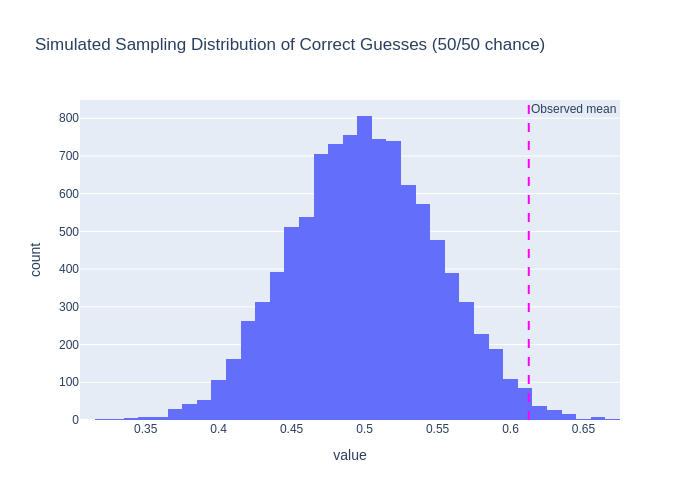

p-value: 0.0191


In [81]:
import pandas as pd
import numpy as np
import plotly.express as px

# Set random seed for experiment reproducibility
np.random.seed(1)

n_sim_samples = 10000 # number of simulated samples
sim_sample_means = np.zeros(n_sim_samples) # array of simulated sample means
observed_mean = 49/80 # observed sample mean (equal to 0.6125) 
H0_p = 0.5 # the p-value assuming the null hypothesis is true

# simulate a sampling distribution of means assuming the null hypothesis is true
for i in range(n_sim_samples):
    sim_sample_means[i] = np.random.choice(2, 100).mean()

# calculate the p value by taking the proportion of simulated sample means that are as or more extreme than the observed statistic
p = (abs(sim_sample_means - H0_p) >= abs(observed_mean - H0_p)).sum()/n_sim_samples

# display the simulated sampling distribution of means assuming null hypothesis is true as a histogram
fig = px.histogram(pd.DataFrame(sim_sample_means), title='Simulated Sampling Distribution of Correct Guesses (50/50 chance)')
fig.update_layout(showlegend=False)
fig.add_vline(x=0.6125, line_dash='dash', line_color='fuchsia', annotation_text='Observed mean')
fig.show(renderer='png')

print('p-value: ' + str(p))

The p-value is 0.0191. According to that one standardized table of significance level thresholds, there is moderate evidence against the null hypothesis since $0.05 \ge p > 0.01$. This is because the p-value means that if the null hypothesis is true (i.e. the students were truly guessing completely randomly), the chance of getting the observed mean ($\bar x = 0.6125$) is 1.91%. This is a fairly low probability, so we will reject the null hypothesis and fail to reject the alternative hypothesis.

We have rejected the null hypothesis that the students were guessing at complete random ($H_0 : p = 0.5$) with moderate evidence, and failed to reject the alternative hypothesis that the students were not guessing at complete random ($H_A : p \neq 0.5$). In other words, we conclude, with a moderate level of confidence, that the students of STA130 are likely able to tell the difference between a cup with either the milk poured in first or the tea.

##### Question 9:
Yes.